![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6
### Ennio Maldonado

In [172]:
import numpy as np
from scipy import ndimage as ndi
from skimage import data, util, img_as_float, exposure, filters
from skimage.io import imsave, imread, imshow
from skimage.color import rgb2hsv, rgb2gray
from skimage.exposure import histogram
from skimage.feature import canny
from skimage.filters import sobel, gaussian, unsharp_mask
from skimage.morphology import watershed
import matplotlib.pyplot as plt
from matplotlib import ticker

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

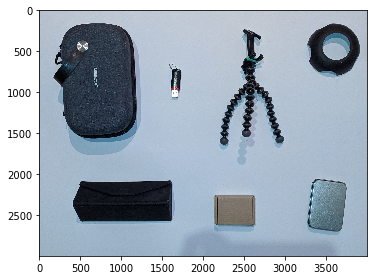

In [173]:
# Load the clock blurred image from data
objects = imread('objects.jpg')
objects_gray = rgb2gray(objects)
imshow(objects)

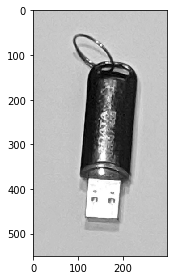

In [174]:
# Crop the image [y1:y2, x1:x2]
cropped_object = objects_gray[600:1150,1500:1800]
imshow(cropped_object)


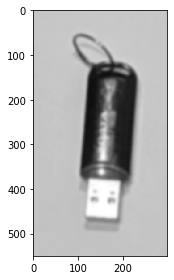

In [175]:
# Smoothen the image 
# with skimage
smoothed_object = gaussian(cropped_object, sigma=3)
imshow(smoothed_object)

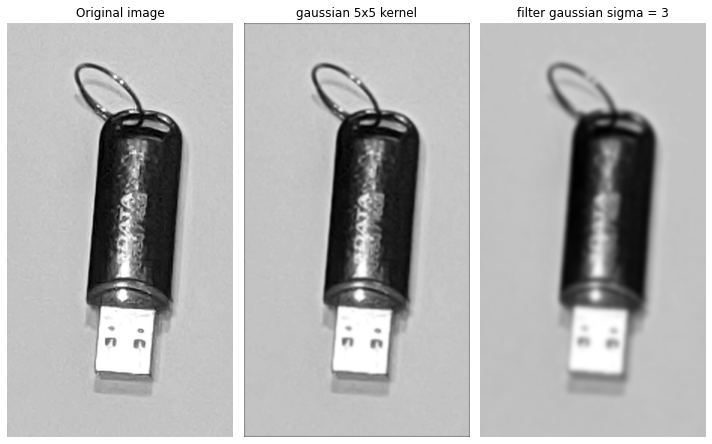

In [176]:
# with kernel filter.
kernel = 1/10000*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 
kernel_filter = ndi.convolve(cropped_object, kernel, mode='constant', cval=0.0)

fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(cropped_object, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(kernel_filter, cmap=plt.cm.gray)
ax[1].set_title('gaussian 5x5 kernel')
ax[2].imshow(smoothed_object, cmap=plt.cm.gray)
ax[2].set_title('filter gaussian sigma = 3')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

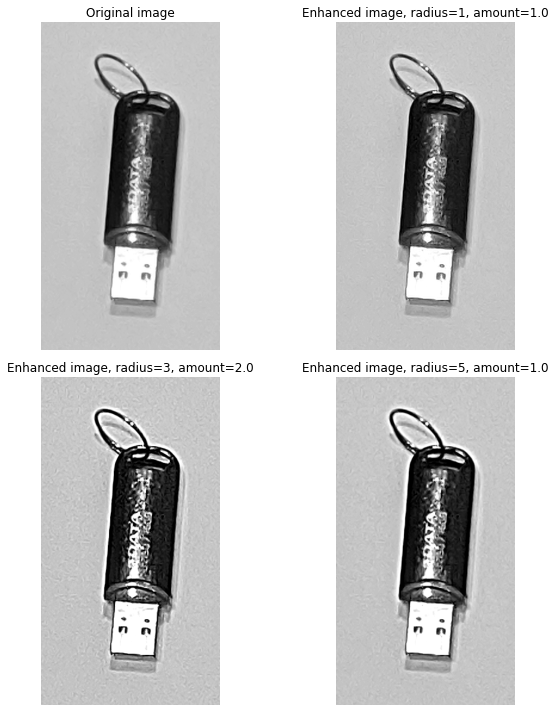

In [177]:
# Sharpen the image with unsharp_mask filter
sharpened_object_1 = unsharp_mask(cropped_object, radius=1, amount=1)
sharpened_object_2 = unsharp_mask(cropped_object, radius=3, amount=2)
sharpened_object_3 = unsharp_mask(cropped_object, radius=5, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(cropped_object, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(sharpened_object_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(sharpened_object_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=3, amount=2.0')
ax[3].imshow(sharpened_object_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=5, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

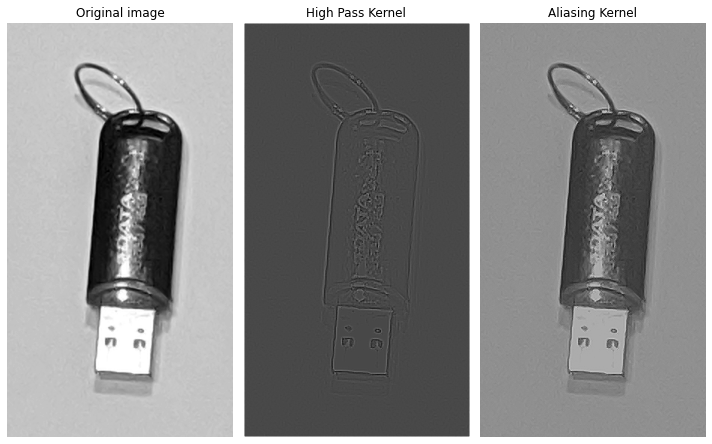

In [184]:
# Sharpen with a kernel filter

kernel_1 = np.array([ [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) / 9

kernel_2 = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

kernel_filter_1 = ndi.convolve(cropped_object, kernel_1, mode='constant', cval=0.0)

kernel_filter_2 = ndi.convolve(cropped_object, kernel_2, mode='mirror', cval=0.0)

fig, axes = plt.subplots(nrows=1, ncols=3,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(cropped_object, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(kernel_filter_1, cmap=plt.cm.gray)
ax[1].set_title('High Pass Kernel')
ax[2].imshow(kernel_filter_2, cmap=plt.cm.gray)
ax[2].set_title('Aliasing Kernel')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

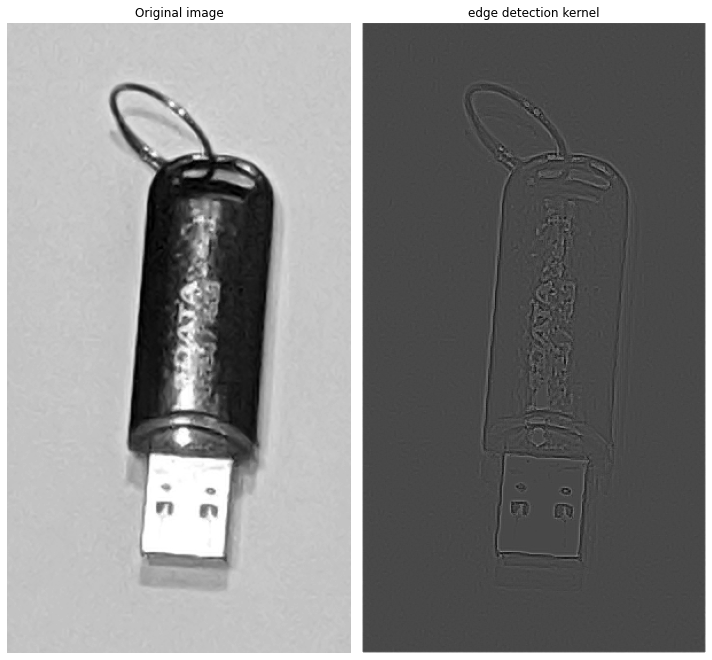

In [185]:
# Find the edges of the image with at least two different methods.

# Method 1 - Kernel Filter

kernel = np.array([ [-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])

kernel_filter = ndi.convolve(cropped_object, kernel, mode='constant', cval=0.0)

fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(cropped_object, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(kernel_filter_1, cmap=plt.cm.gray)
ax[1].set_title('edge detection kernel')


for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

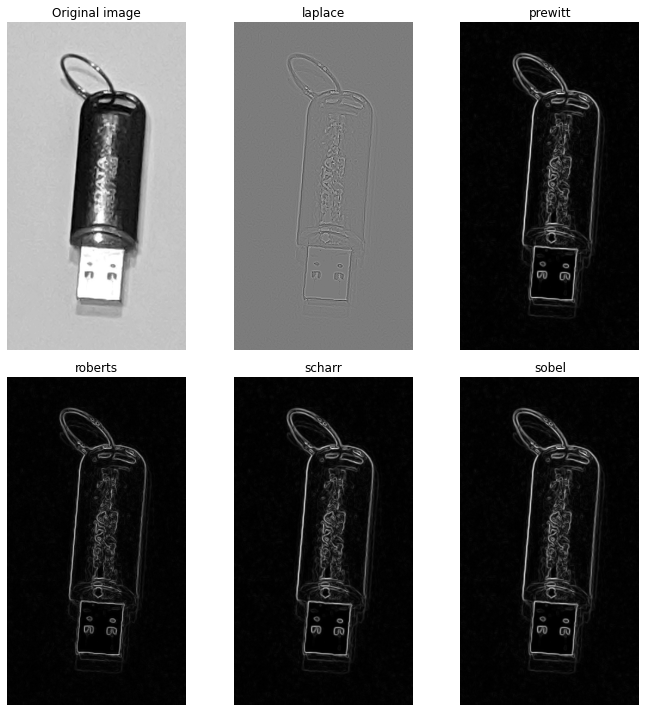

In [186]:
# Find the edges of the image with at least two different methods.

# Method 2 - skimage edge detection filters comparison
laplace = filters.laplace(cropped_object)
prewitt = filters.prewitt(cropped_object)
roberts = filters.roberts(cropped_object)
scharr = filters.scharr(cropped_object)
sobel = filters.sobel(cropped_object)

fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(cropped_object, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(laplace, cmap=plt.cm.gray)
ax[1].set_title('laplace')
ax[2].imshow(prewitt, cmap=plt.cm.gray)
ax[2].set_title('prewitt')
ax[3].imshow(roberts, cmap=plt.cm.gray)
ax[3].set_title('roberts')
ax[4].imshow(scharr, cmap=plt.cm.gray)
ax[4].set_title('scharr')
ax[5].imshow(sobel, cmap=plt.cm.gray)
ax[5].set_title('sobel')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()


In [187]:
# From the processes above, save the image that you prefer as a .jpg
imsave('Edge_Detection_Image.jpg',sobel)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

starting point


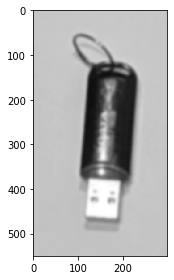

In [188]:
print("starting point")
imshow(smoothed_object)

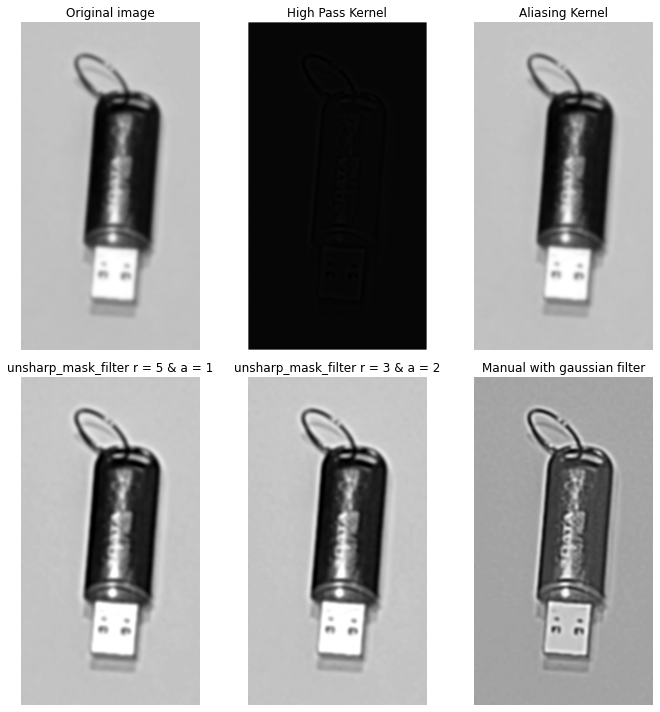

In [189]:
# Sharpen with a kernel filter

kernel_1 = np.array([ [-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]) / 9

kernel_2 = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

kernel_filter_1 = ndi.convolve(smoothed_object, kernel_1, mode='constant', cval=0.0)
kernel_filter_2 = ndi.convolve(smoothed_object, kernel_2, mode='mirror', cval=0.0)

# Sharpen the image with unsharp_mask filter

sharpened_object_1 = unsharp_mask(smoothed_object, radius=5, amount=1)
sharpened_object_2 = unsharp_mask(smoothed_object, radius=3, amount=2)

# Sharpen by hand using ndi gaussian filter
smoothed_object_gauss = ndi.gaussian_filter(smoothed_object, 1)
alpha = 40
sharpened_manual = smoothed_object + alpha * (smoothed_object - smoothed_object_gauss)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(smoothed_object, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(kernel_filter_1, cmap=plt.cm.gray)
ax[1].set_title('High Pass Kernel')
ax[2].imshow(kernel_filter_2, cmap=plt.cm.gray)
ax[2].set_title('Aliasing Kernel')
ax[3].imshow(sharpened_object_1, cmap=plt.cm.gray)
ax[3].set_title('unsharp_mask_filter r = 5 & a = 1')
ax[4].imshow(sharpened_object_2, cmap=plt.cm.gray)
ax[4].set_title('unsharp_mask_filter r = 3 & a = 2')
ax[5].imshow(sharpened_manual, cmap=plt.cm.gray)
ax[5].set_title('Manual with gaussian filter')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

starting point


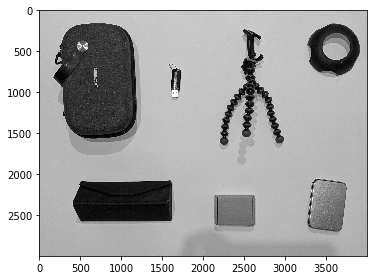

In [190]:
print("starting point")
imshow(objects_gray)

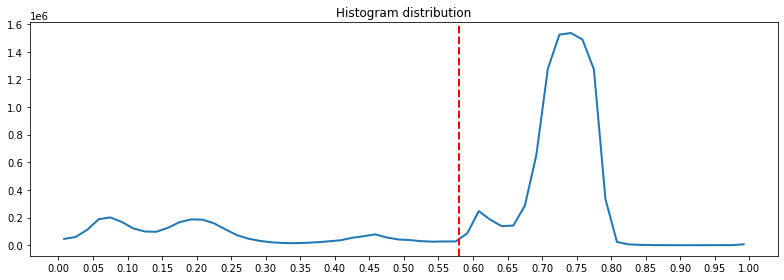

In [191]:
# Segmentaion by hand using histogram
hist, bin_edges = np.histogram(objects_gray, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

# Plotting histogram
fig, ax = plt.subplots(ncols=1, sharex=True, sharey=True,
                       figsize=(11, 4))

ax.plot(bin_centers, hist, lw=2)
ax.axvline(0.58, color='r', ls='--', lw=2)
ax.set_title('Histogram distribution')
loc = ticker.MultipleLocator(0.05)
ax.xaxis.set_major_locator(loc)
plt.tight_layout()
plt.show()

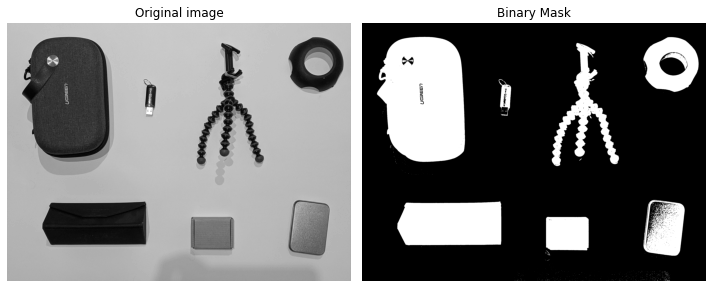

In [192]:
# Binary mask
binary_objects = objects_gray < 0.58

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(objects_gray, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(binary_objects, cmap=plt.cm.gray)
ax[1].set_title('Binary Mask')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

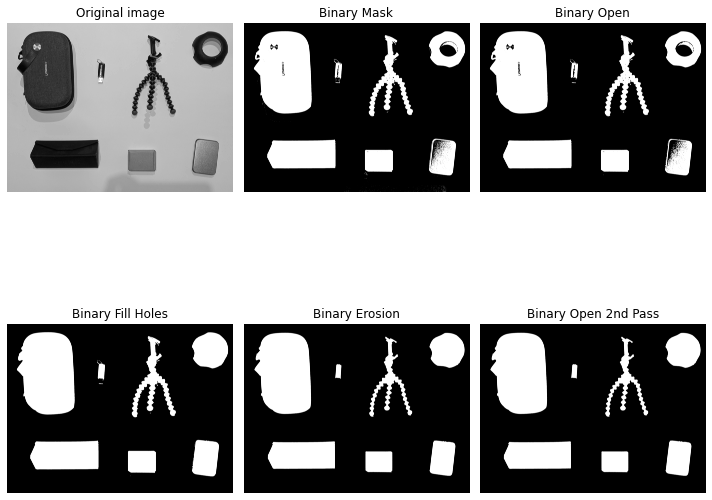

In [193]:
# Applying some mathematical morphology to get tid of noise.

# Remove small white regions round one, don't want to lose the noisy objects.
open_img = ndi.binary_opening(binary_objects,iterations=3)
# fill black holes to make objects solid
fill_img = ndi.binary_fill_holes(open_img)
# Binary Erosion to remove small invisible objects
erosion_img = ndi.binary_erosion(fill_img, iterations=10)
# Remove small white regions making sure all small objects are eliminated
open_img_2 = ndi.binary_opening(erosion_img,iterations=5)


# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(objects_gray, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(binary_objects, cmap=plt.cm.gray)
ax[1].set_title('Binary Mask')
ax[2].imshow(open_img, cmap=plt.cm.gray)
ax[2].set_title('Binary Open')
ax[3].imshow(fill_img, cmap=plt.cm.gray)
ax[3].set_title('Binary Fill Holes')
ax[4].imshow(erosion_img, cmap=plt.cm.gray)
ax[4].set_title('Binary Erosion')
ax[5].imshow(open_img_2, cmap=plt.cm.gray)
ax[5].set_title('Binary Open 2nd Pass')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

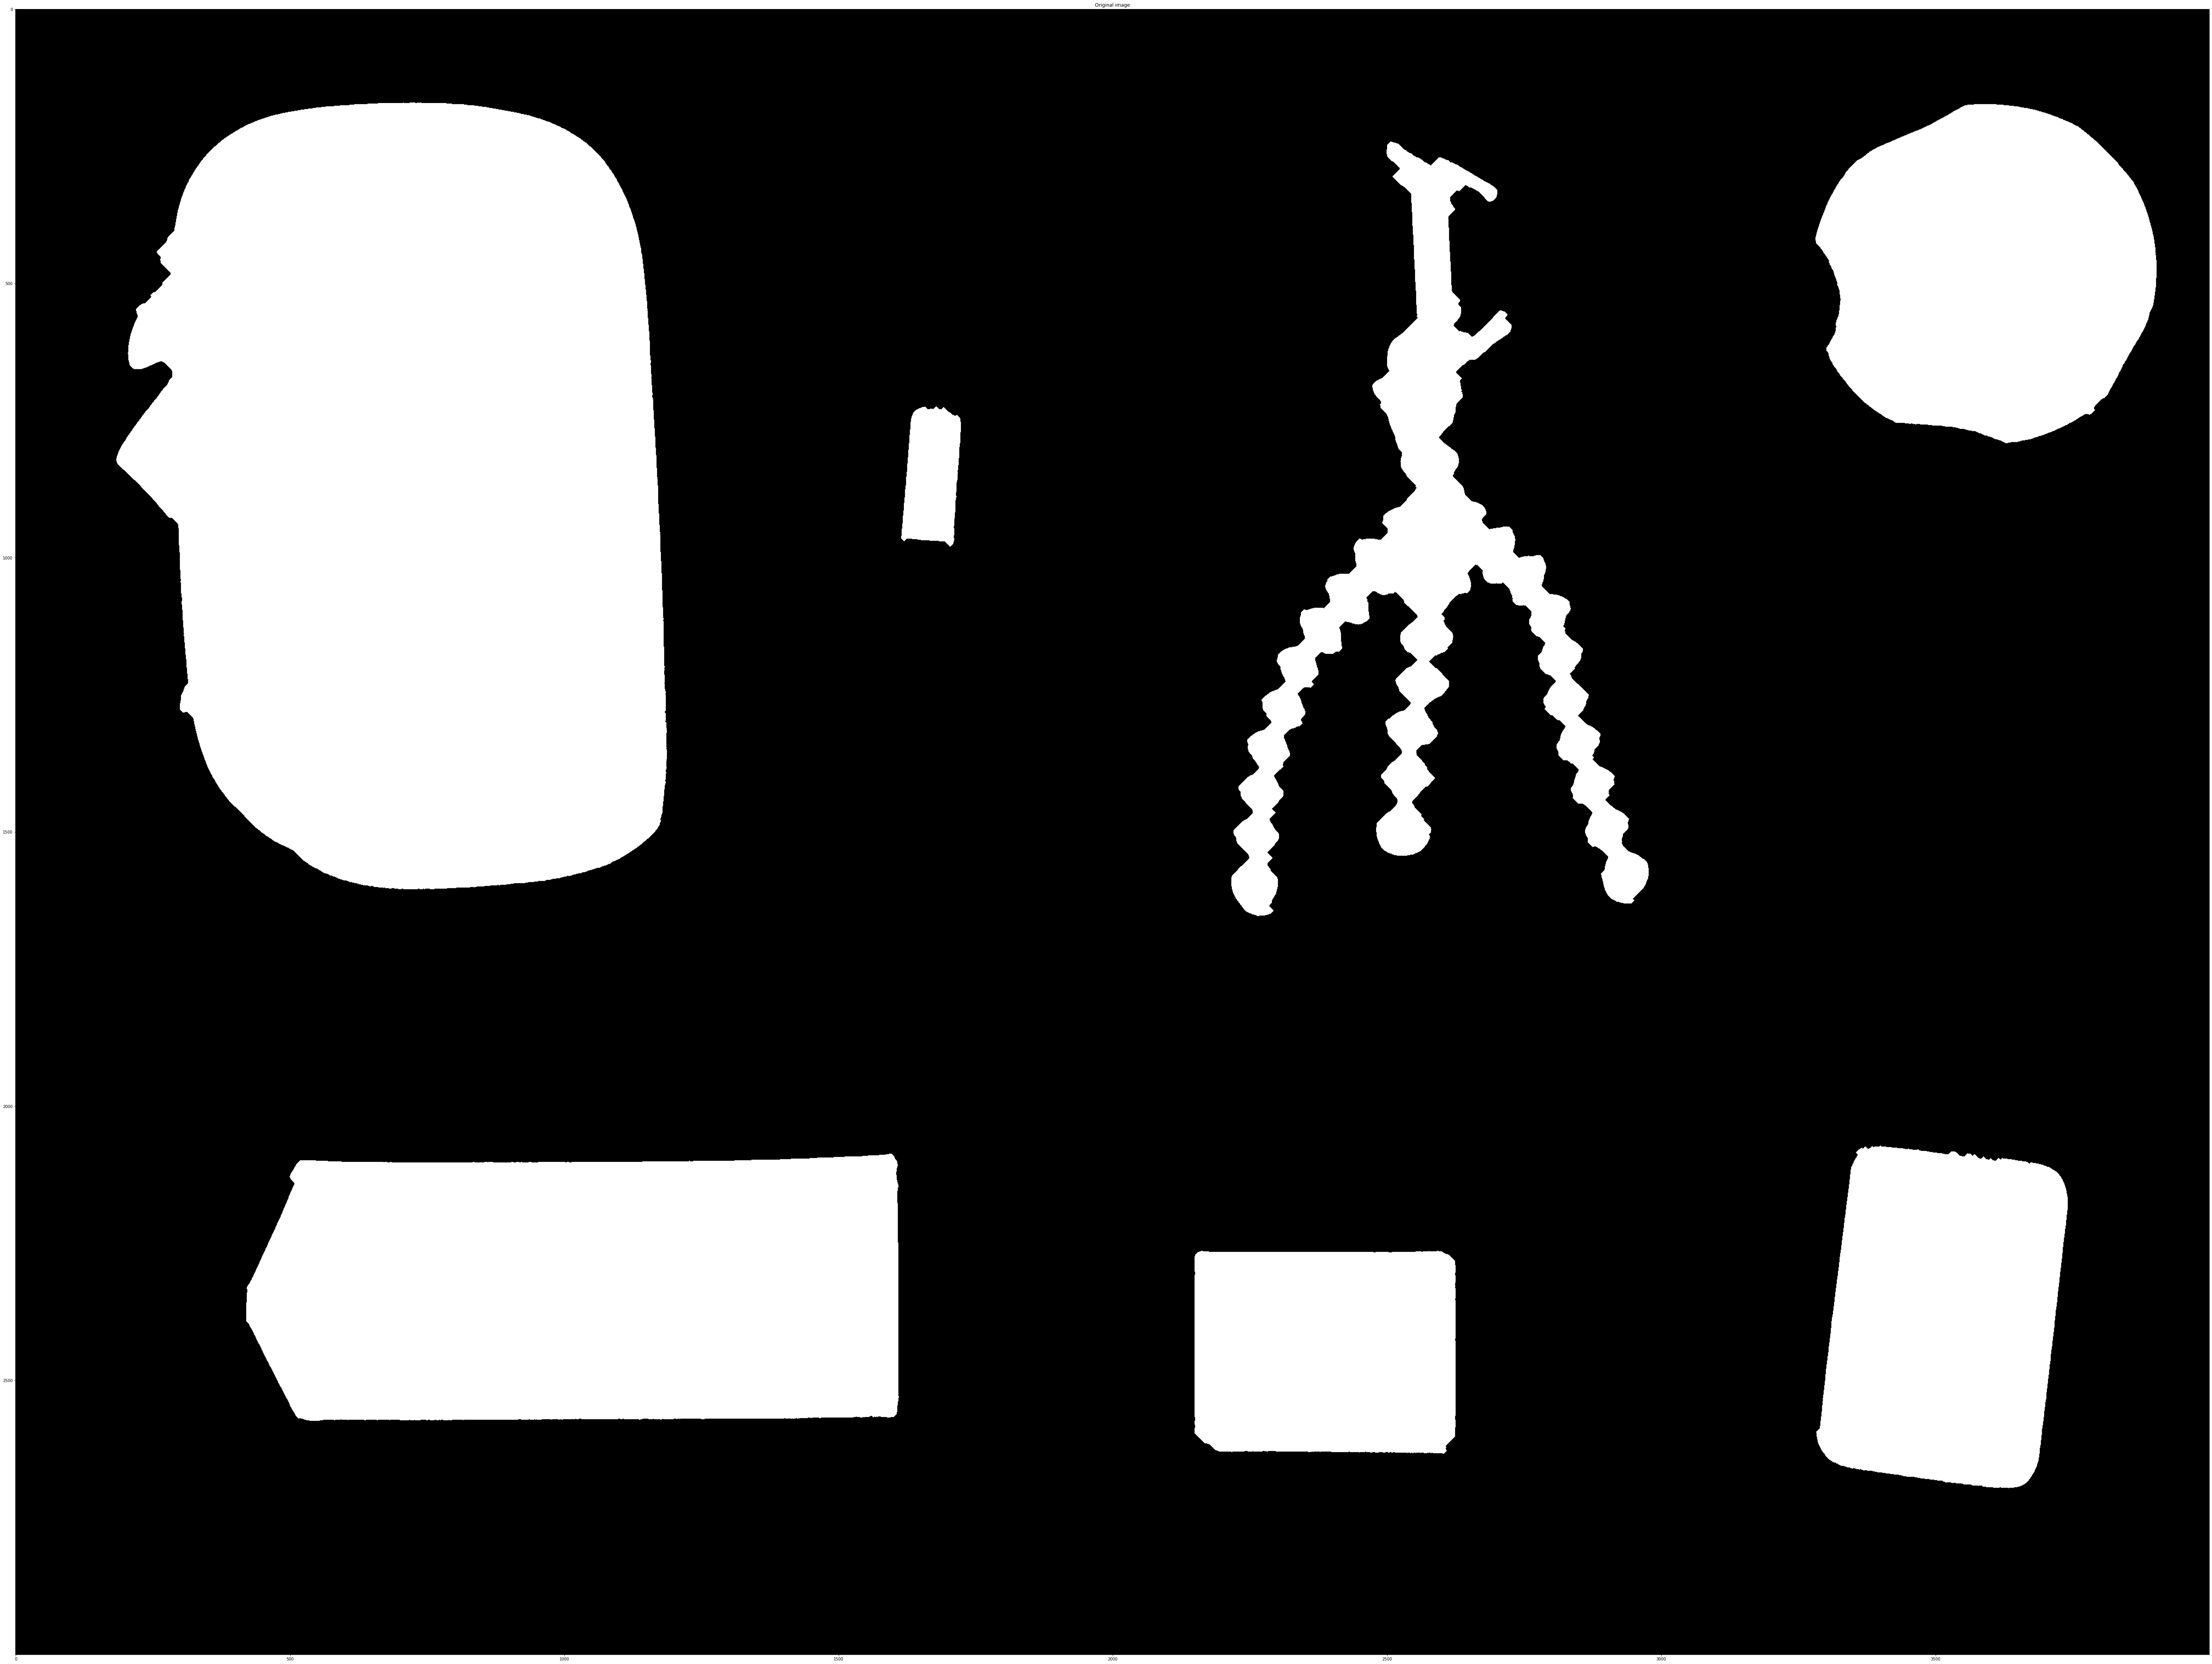

In [197]:
# Final result
fig, ax = plt.subplots(figsize=(100, 100))
ax.imshow(open_img_2, cmap=plt.cm.gray)
ax.set_title('Original image')
plt.show()

In [198]:
# Counting the objects at each step
print(f"\nSTEP 0: Binary Image --> {ndi.label(binary_objects)[1]} objects")
print(f"\nSTEP 1: Binary Open --> {ndi.label(open_img)[1]} objects")
print(f"\nSTEP 2: Binary Fill Holes --> {ndi.label(fill_img)[1]} objects")
print(f"\nSTEP 3: Binary Erosion --> {ndi.label(erosion_img)[1]} objects")
print(f"\nSTEP 4: Binary Open 2nd Pass --> {ndi.label(open_img_2)[1]} objects")


STEP 0: Binary Image --> 1328 objects

STEP 1: Binary Open --> 105 objects

STEP 2: Binary Fill Holes --> 28 objects

STEP 3: Binary Erosion --> 16 objects

STEP 4: Binary Open 2nd Pass --> 7 objects


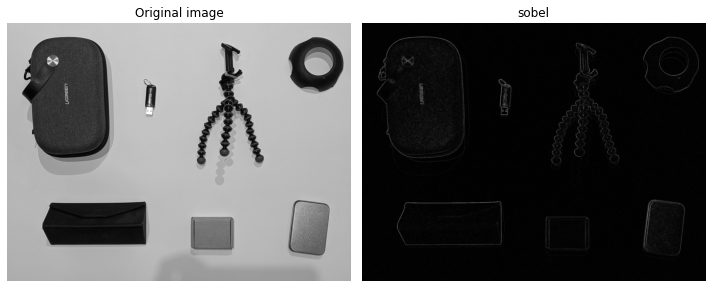

In [200]:
# Second Approach Edge Detection 

# Sobel filter for edge detection
sobel_objects = filters.sobel(objects_gray)

fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(objects_gray, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(sobel_objects_2, cmap=plt.cm.gray)
ax[1].set_title('sobel')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()


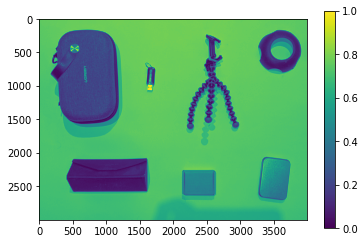

In [201]:
# Third Approach Watershed method
plt.imshow(objects_gray)
plt.colorbar()
plt.show()

/home/techno/.local/share/virtualenvs/10_Data_Science_Foundations-ivQV9HVp/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


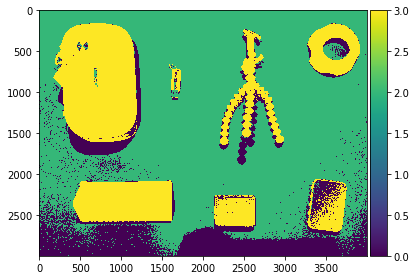

In [202]:
# Let's create a zeros array with the same shape as coins
markers = np.zeros_like(objects_gray)

# When the pixels are below 0.5 label as object
markers[objects_gray <= 0.5] = 3

# When the pixels are above 0.6 label as background
markers[objects_gray > 0.7] = 2
imshow(markers)

/home/techno/.local/share/virtualenvs/10_Data_Science_Foundations-ivQV9HVp/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/home/techno/.local/share/virtualenvs/10_Data_Science_Foundations-ivQV9HVp/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


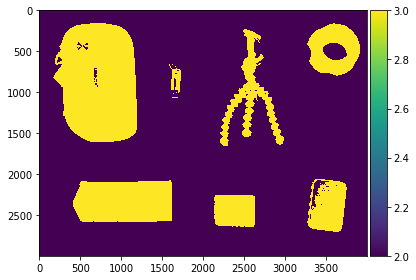

In [203]:
segmentation_ = watershed(sobel_objects, markers)
imshow(segmentation_)

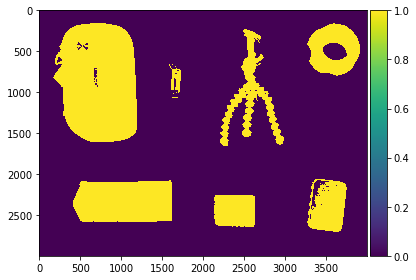

In [204]:
# Map back to grayscale 
ws_result = segmentation_ - 2
imshow(ws_result)

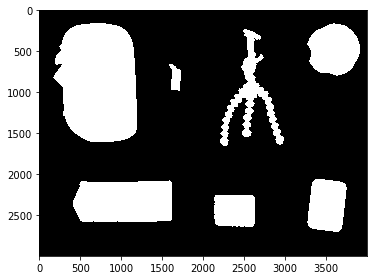

In [206]:
# Mathematical morphology to get rid of remaining noise
fill_ws = ndi.binary_fill_holes(ws_result)
open_ws = ndi.binary_opening(fill_ws, iterations=10)

imshow(open_ws)

In [207]:
print(f"\nSTEP 0: Watershed --> {ndi.label(ws_result)[1]} objects")
print(f"\nSTEP 1: Fill Watershed --> {ndi.label(fill_ws)[1]} objects")
print(f"\nSTEP 2: Open Watershed --> {ndi.label(open_ws)[1]} objects")


STEP 0: Watershed --> 36 objects

STEP 1: Fill Watershed --> 11 objects

STEP 2: Open Watershed --> 7 objects


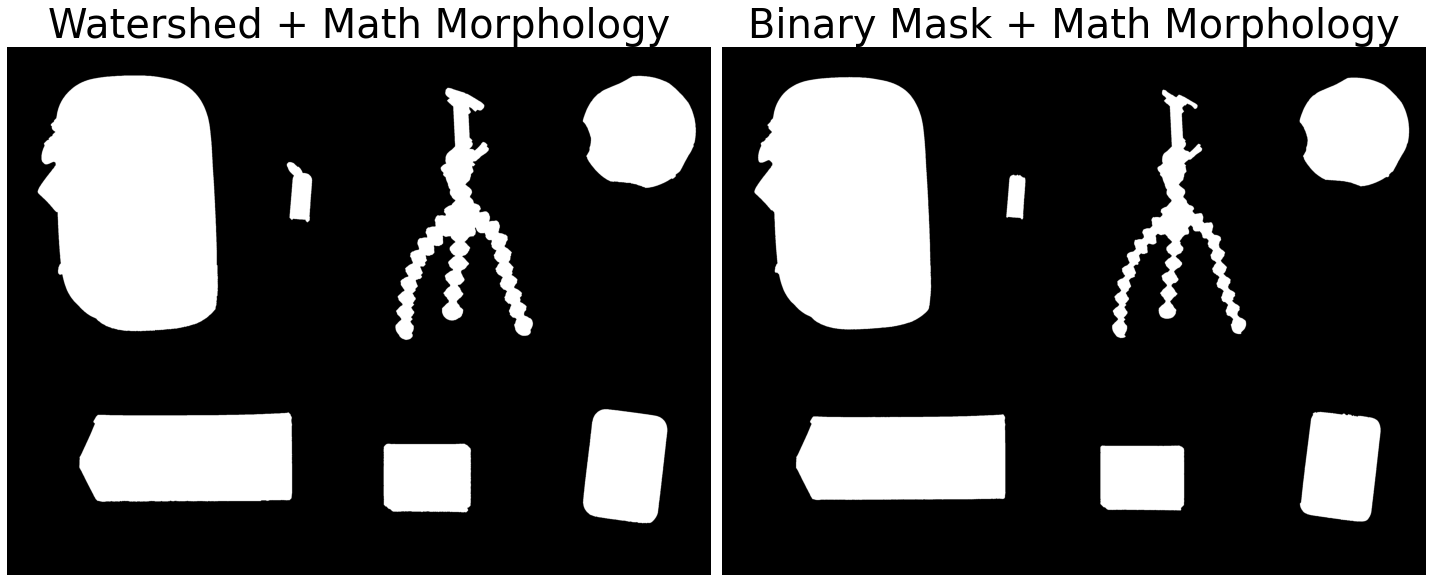

In [214]:
# Visual Comparison of the two approaches

fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(open_ws, cmap=plt.cm.gray)
ax[0].set_title('Watershed + Math Morphology', fontsize=40)
ax[1].imshow(open_img_2, cmap=plt.cm.gray)
ax[1].set_title('Binary Mask + Math Morphology', fontsize=40)

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()